# Instacart Project

In [ ]:
import pandas as pd
import numpy as np
import os 
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
# 1) Read the excel sheets and store them as pandas dataframes.
#Set working directory
path = '/Users/serena/Desktop/TDI/instacart_project'    #Need to update path accordingly
os.chdir(path)
#Read excel sheets to pandas dataframes
df_orders = pd.read_csv('orders.csv')      #(3.4m rows, 206k users)
df_products = pd.read_csv('products.csv')     #(50k rows)
df_departments= pd.read_csv('departments.csv')  #(21 rows)
df_aisles = pd.read_csv('aisles.csv')         # (134 rows)
df_prior = pd.read_csv('order_products_prior.csv')   #orders prior to that users most recent order (~3.2m orders)
df_train = pd.read_csv('order_products_train.csv')   # training data supplied to participants (~131k orders)

In [4]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
df_orders.order_id.nunique()

3421083

In [5]:
df_orders.user_id.nunique()

206209

In [20]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [29]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [26]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [27]:
df_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [28]:
df_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
# Heatmap of orders, when

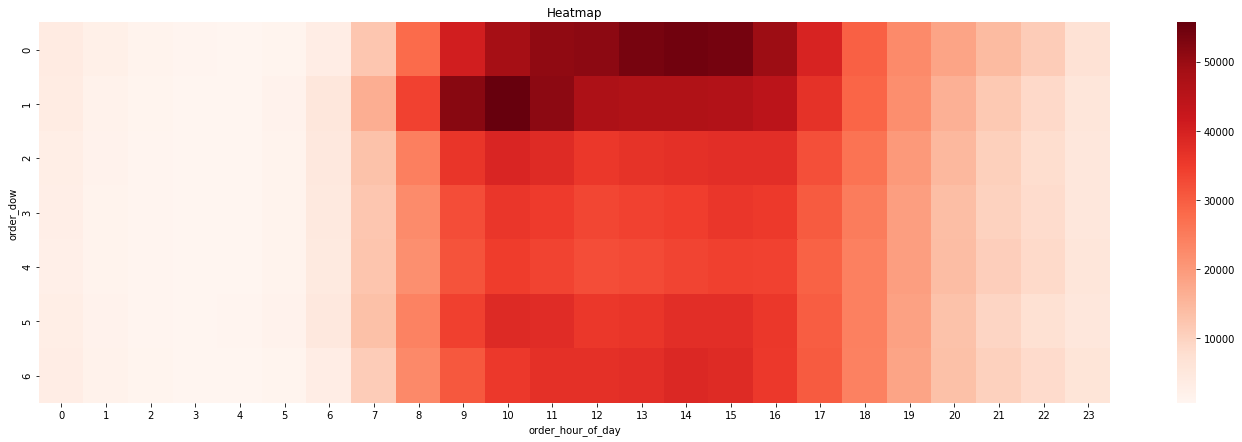

In [12]:
df_grouped = df_orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
df_grouped = df_grouped.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(24,7))
sns.heatmap(df_grouped, cmap="Reds")
plt.title("Heatmap")
plt.show()

In [ ]:
# When to reorder, how often

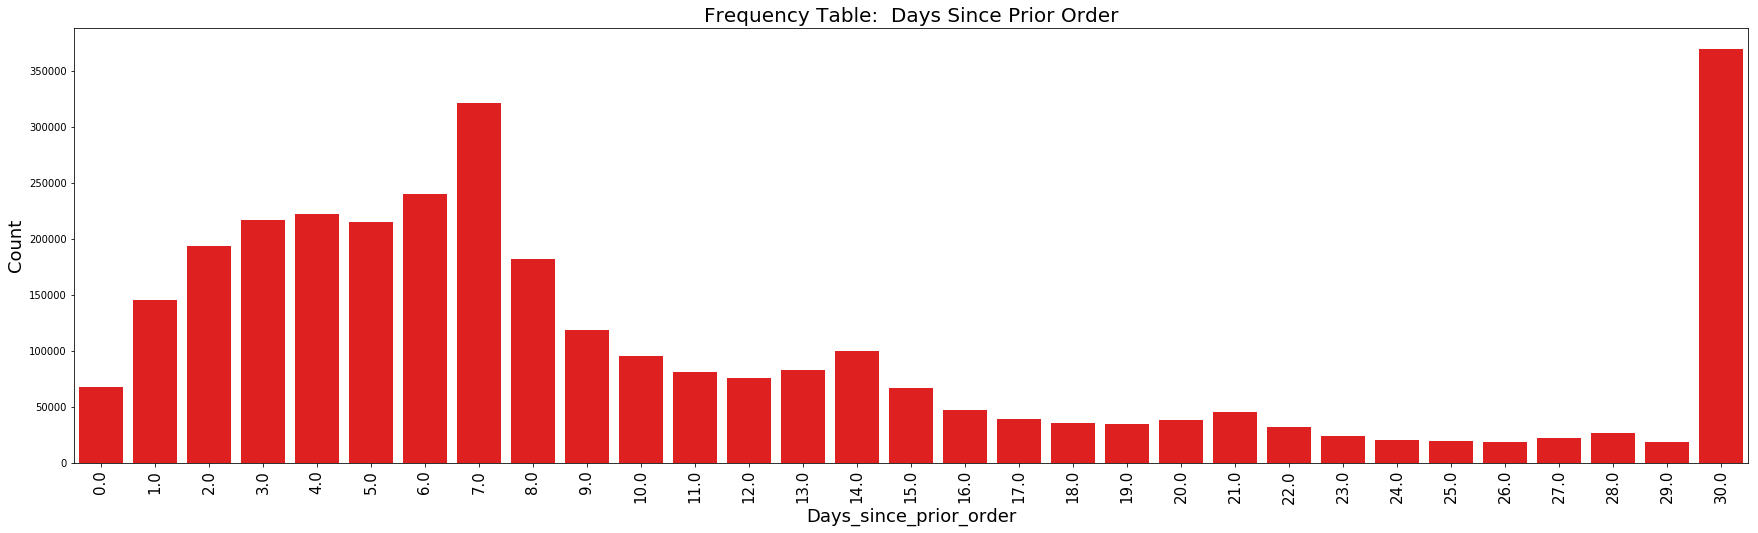

In [13]:
plt.figure(figsize=(30,8))
sns.countplot(x="days_since_prior_order", data=df_orders, color='red')
plt.ylabel('Count', fontsize=18)
plt.xlabel('Days_since_prior_order', fontsize=18)
plt.xticks(rotation='vertical', fontsize=15)
plt.title("Frequency Table:  Days Since Prior Order", fontsize=20)
plt.show()

In [7]:
# freqency table for number of orders by each user

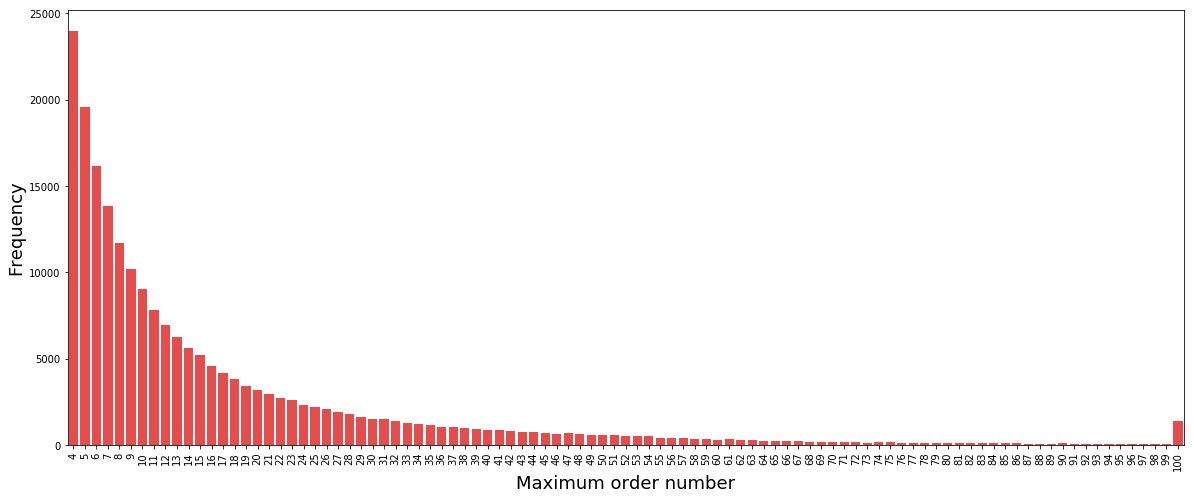

In [14]:
cnt = df_orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt = cnt.order_number.value_counts()
plt.figure(figsize=(20,8))
sns.barplot(cnt.index, cnt.values, alpha=0.8, color='r')
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Maximum order number', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Things bought, What?

In [5]:
#Merge df_prior with product details
df_prior = pd.merge(df_prior, df_products, on='product_id', how='left')
df_prior = pd.merge(df_prior, df_aisles, on='aisle_id', how='left')
df_prior = pd.merge(df_prior, df_departments, on='department_id', how='left')
df_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


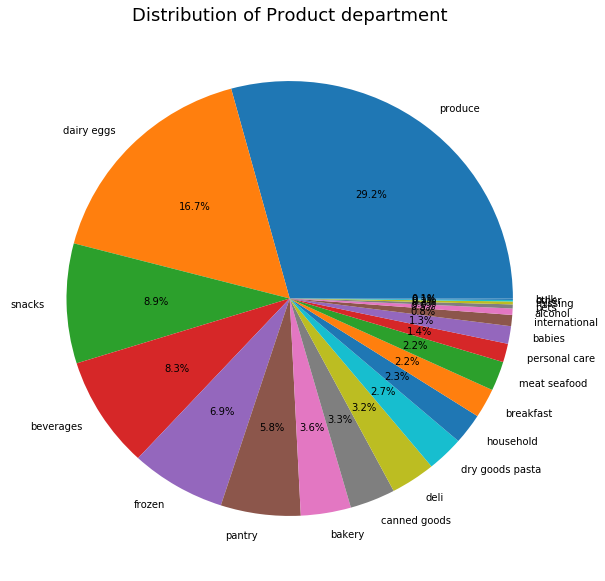

In [7]:
plt.figure(figsize=(10,10))
temp = df_prior['department'].value_counts()
labels = (np.array(temp.index))
sizes = (np.array((temp / temp.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%')
plt.title("Distribution of Product department", fontsize=18)
plt.show()

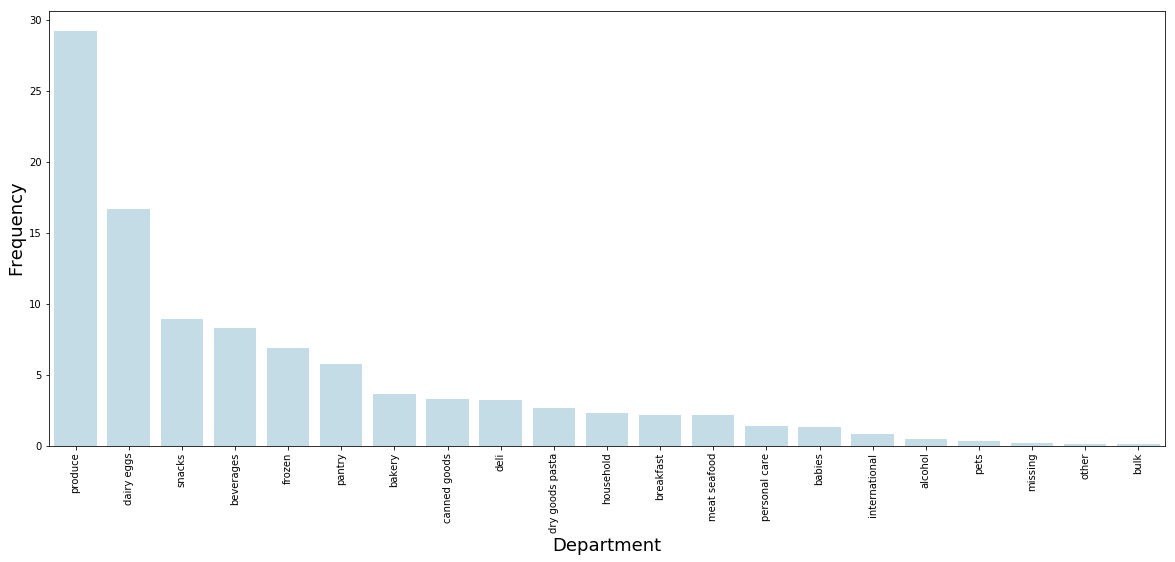

In [10]:
#cnt = df_orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
#cnt = cnt.order_number.value_counts()
plt.figure(figsize=(20,8))
sns.barplot(labels, sizes, alpha=0.8, color='lightblue')
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Department', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Things bought, how many items in each order?

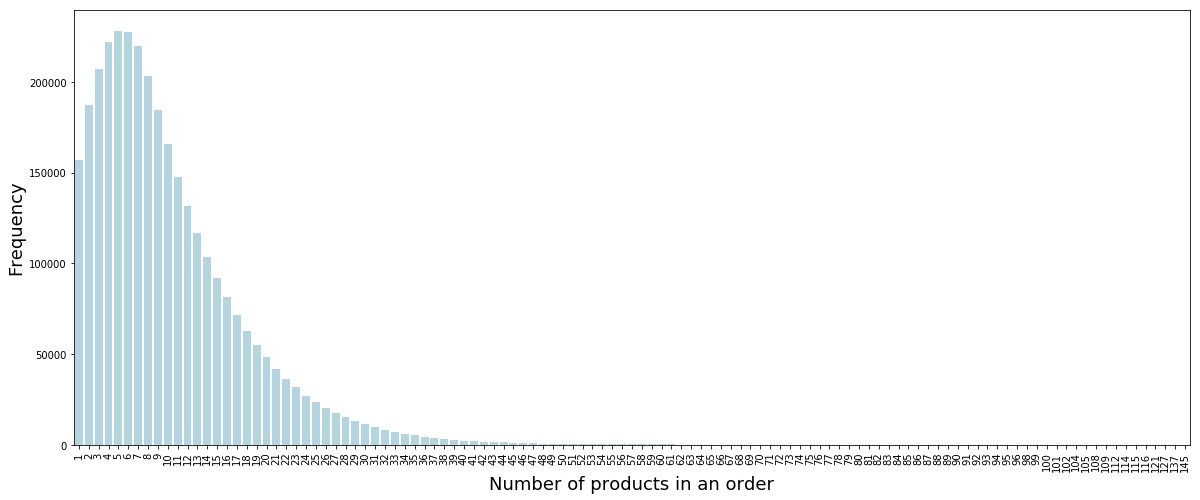

In [11]:
df_grouped = df_prior.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
count = df_grouped.add_to_cart_order.value_counts()
plt.figure(figsize=(20,8))
sns.barplot(count.index, count.values,  color='lightblue')
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Number of products in an order', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Reorder behavior

In [ ]:
# reorder vs. department and aisle

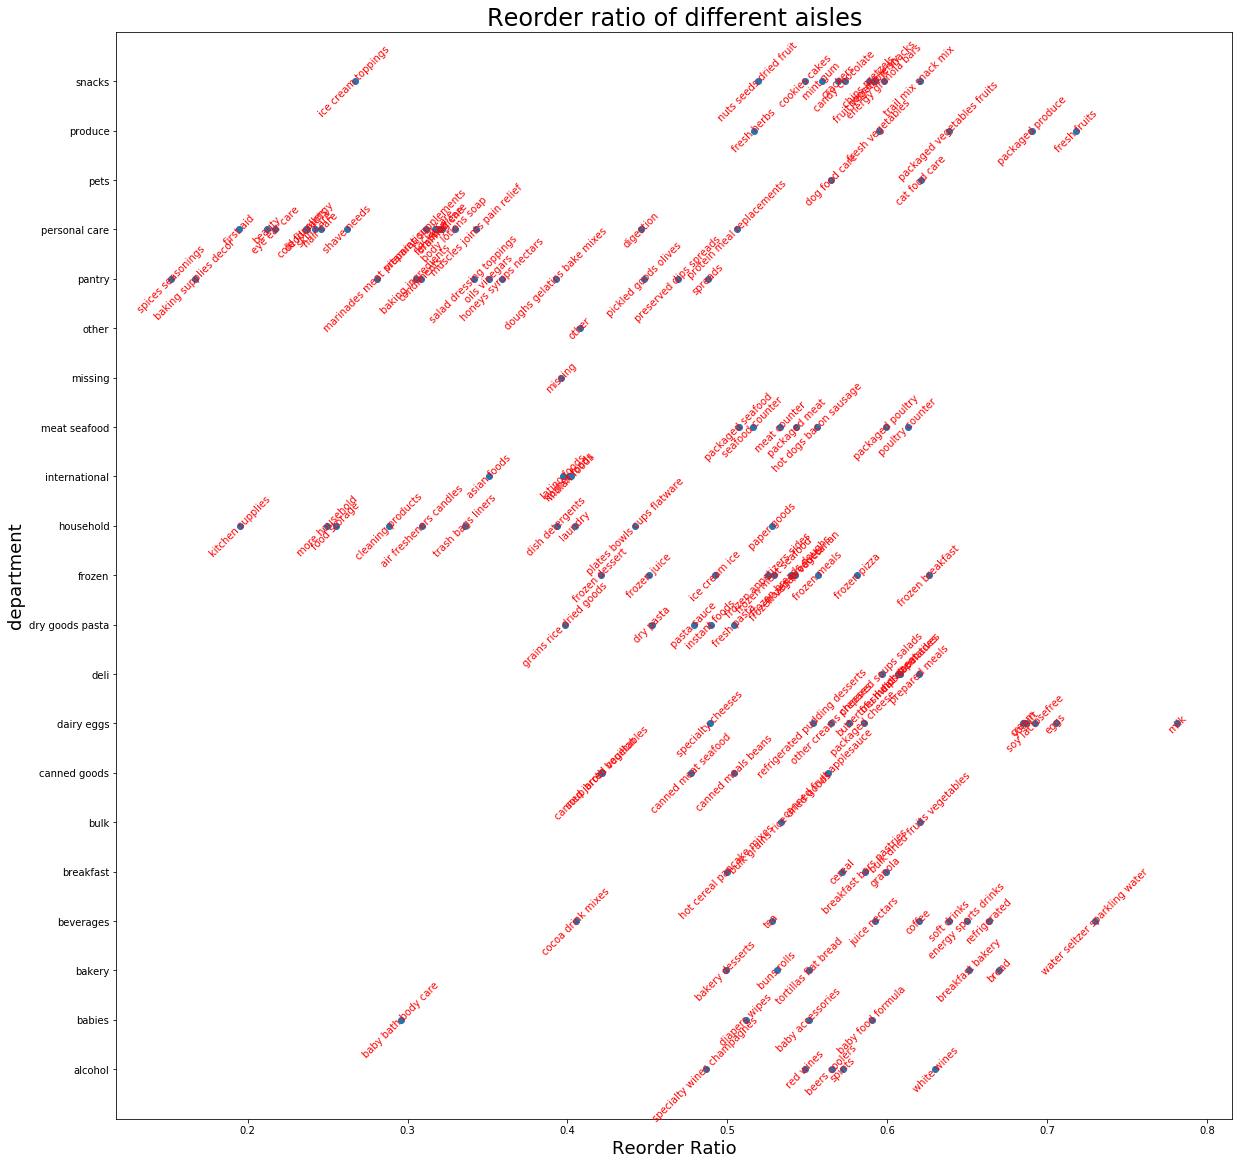

In [51]:
df_reorder = df_prior.groupby(["department", "aisle"])["reordered"].aggregate("mean").reset_index()
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(df_reorder.reordered.values, df_reorder.department.values)
for i, txt in enumerate(df_reorder.aisle.values):
    ax.annotate(txt, (df_reorder.reordered.values[i], df_reorder.department.values[i]), rotation=45, ha='center', va='center', color='red')
plt.xlabel('Reorder Ratio',fontsize=18)
plt.ylabel('department',fontsize=18)
plt.title("Reorder ratio of different aisles", fontsize=24)
plt.show()

In [ ]:
# Unsupervised learning, cluster users

In [5]:
# Merge data to get a complete dataset
df_prior_c = pd.merge(df_prior, df_orders, on='order_id', how='left')

In [14]:
df= df_prior_c.sort_values(by=['user_id', 'order_number', 'add_to_cart_order'])

In [18]:
df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
24076664,2539329,196,1,0,Soda,77,7,soft drinks,beverages,1,prior,1,2,8,NaN
24076665,2539329,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs,1,prior,1,2,8,NaN
24076666,2539329,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks,1,prior,1,2,8,NaN
24076667,2539329,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks,1,prior,1,2,8,NaN
24076668,2539329,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household,1,prior,1,2,8,NaN
22742744,2398795,196,1,1,Soda,77,7,soft drinks,beverages,1,prior,2,3,7,15.0
22742745,2398795,10258,2,0,Pistachios,117,19,nuts seeds dried fruit,snacks,1,prior,2,3,7,15.0
22742746,2398795,12427,3,1,Original Beef Jerky,23,19,popcorn jerky,snacks,1,prior,2,3,7,15.0
22742747,2398795,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce,1,prior,2,3,7,15.0
22742748,2398795,26088,5,1,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks,1,prior,2,3,7,15.0


In [21]:
# get a 2 way table on what department people buy
user_department = pd.crosstab(df['user_id'], df['department'])

In [22]:
user_department.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,13,3,0,0,13,0,0,...,2,0,0,0,0,1,0,0,5,22
2,0,0,2,9,3,0,1,48,21,0,...,0,3,1,0,0,11,1,0,36,42
3,0,0,0,3,0,0,0,21,2,4,...,1,0,0,0,0,4,0,0,38,9
4,2,0,2,3,0,0,1,0,2,0,...,2,0,0,0,0,0,0,0,2,1
5,0,0,0,0,0,0,1,8,1,1,...,0,2,0,0,0,2,0,0,19,1


In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [36]:
pca = PCA(n_components=4)
pca.fit(user_department)
pca_samples = pca.transform(user_department)
pca_df = pd.DataFrame(pca_samples)
pca_df.head()

,0,1,2,3
0,-42.639967,13.919004,-6.833290,-3.396516
1,6.708748,28.831181,4.381065,-20.681335
2,-14.243010,-7.970956,5.043638,-2.406421
3,-55.654405,-4.908788,-0.330539,0.115324
4,-38.571140,-11.077100,4.303454,-0.385735


(206209, 2)
          2          3
0 -6.833290  -3.396516
1  4.381065 -20.681335
2  5.043638  -2.406421
3 -0.330539   0.115324
4  4.303454  -0.385735


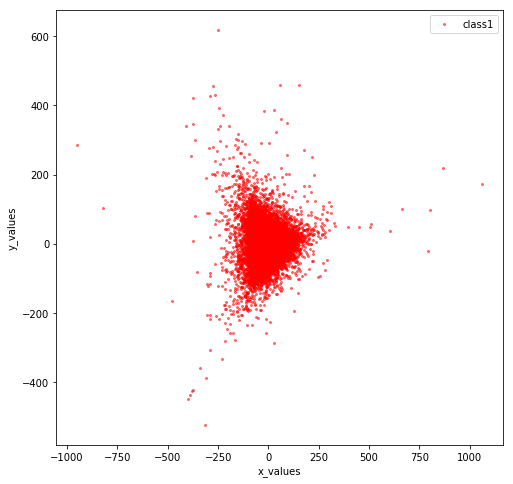

In [44]:
pc = pd.DataFrame(pca_df[[2,3]])
print (pc.shape)
print (pc.head())

fig = plt.figure(figsize=(8,8))
plt.plot(pc[2], pc[3], 'o', markersize=2, color='red', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [51]:
kmeans = KMeans(n_clusters=4, random_state=None).fit(pc)

In [52]:
centers = kmeans.cluster_centers_
c_preds = kmeans.predict(pc)

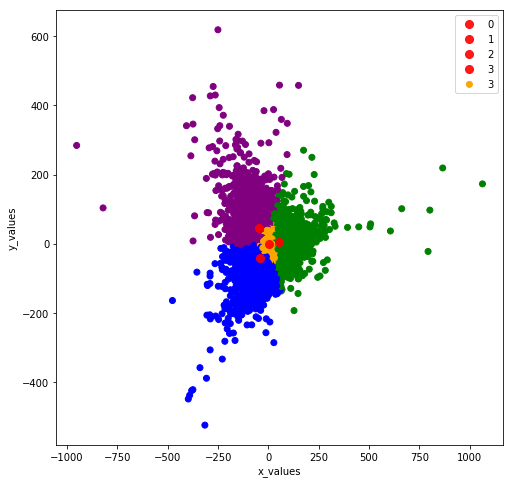

In [53]:
fig = plt.figure(figsize=(8,8))
colors = ['orange','purple','green','blue']
colored = [colors[k] for k in c_preds]
#print (colored[0:10])
plt.scatter(pc[2],pc[3],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [55]:
clusters= user_department.copy()
clusters['cluster'] = c_preds

In [57]:
c0 = clusters[clusters['cluster']==0].drop('cluster',axis=1).mean()
c1 = clusters[clusters['cluster']==1].drop('cluster',axis=1).mean()
c2 = clusters[clusters['cluster']==2].drop('cluster',axis=1).mean()
c3 = clusters[clusters['cluster']==3].drop('cluster',axis=1).mean()

In [60]:
print c0.sort_values(ascending=False)[0:5]
print c1.sort_values(ascending=False)[0:5]
print c2.sort_values(ascending=False)[0:5]
print c3.sort_values(ascending=False)[0:5]

department
produce       35.443458
dairy eggs    18.622783
snacks         9.297474
beverages      8.949741
frozen         8.480140
dtype: float64
department
produce       132.920497
beverages      97.412192
dairy eggs     56.696017
snacks         41.783583
pantry         22.453314
dtype: float64
department
produce       144.428132
dairy eggs    143.901928
snacks         29.836035
frozen         29.453567
pantry         26.847865
dtype: float64
department
produce       134.131619
snacks        100.400673
dairy eggs     61.284818
frozen         43.143098
beverages      35.400367
dtype: float64


In [ ]:
# Scrape receipes from https://www.allrecipes.com/recipes/

In [ ]:
# Build recommendation system based on receipe, purchase history and similar consumers